[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ronzhin-dmitry/GT-VLSI/blob/main/1_Деревья_Минимальное_остовное_дерево.ipynb)

# Деревья. Минимальное остовное дерево.

Как мы определили ранее, графом $G$ называется пара множеств $(V,E)$, где $V$ - конечное множество вершин графа, а $E$ - конечное множество ребер, т.е. неупорядоченных пар элементов $\{v_i,v_j\}$, где $v_i,v_j \in V$. Будем рассматривать графы без петель, то есть начало и конец каждого ребра различны. Если ребра представленны упорядоченными парами элементов, граф становится ориентированным.

**Определение:** В графе $G=(V,E)$ две вершины $v_i,v_j$ называются смежными, если они соединены ребром графа (то есть $e = \{v_i,v_j\} \in E$). Вершина $v_i \in V$ и ребро $e \in E$ инцидентны, если $v_i$ является элементом ребра $e$ (то есть $e = \{v_i,v_k\}$ либо $e = \{v_k, v_i\}$). Два ребра $e_i,e_j$ инциндентные одной вершине также называются смежными.

**Определение:** путем в графе $G = (V,E)$ называется последовательность ребер $(e_1, e_2, ...,e_n), e_i \in E$, такая что любые два сосених элемента последовательности являются смежными. (Можно было бы сказать что "конец" ребра $e_i$ является "началом" ребра $e_{i+1}$ - в случае неориентированного графа у ребра нет "начала" или "конца", однако данная формулировка может упростить понимание определения).

**Определение:** путь в графе $G = (V,E)$ называется цепью, если все ребра входящие в этот путь различны. Если при обходе ребер некоторой цепи каждая вершина встречается не более двух раз, цепь называется элементарной (простой).

**Определение:** замкнутая цепь (то есть вершина-начало цепи совпадает с вершиной-концом цепи) в графе $G = (V,E)$ называется циклом.

**Определение:** граф $G = (V,E)$ называется связным, если между всякой парой вершин в графе найдется путь.

**Определение:** граф $G = (V,E)$ называется ациклическим, если в нем отстутсвуют циклы.

**Определение:** граф $G = (V,E)$ называется деревом, если он связный и ациклический.

In [ ]:
#Для корректного рисования в colab может потребоваться несколько библиотек
# graphviz+lib install
!apt install libgraphviz-dev
!pip install pygraphviz

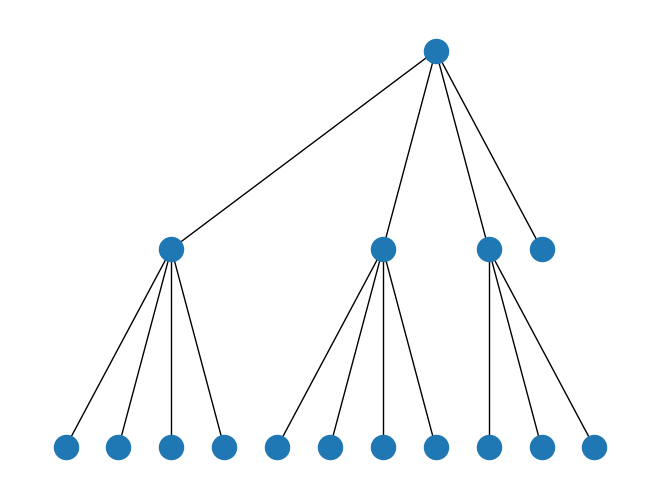

In [4]:
# Попробуем визуализировать некоторое дерево при помощи networkx
#full_rary_tree(r,n) генерирует дерево в котором:
# r - степень каждой вершины кроме, может быть, последнего яруса,
# поскольку сначала заполняются "верхние" слои - слева направо
# n - общее количество вершин
import networkx as nx
import matplotlib.pyplot as plt
G = nx.full_rary_tree(4,16)
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G,pos)
plt.show()

Дерево само по себе является довольно мощной абстракцией, которая активно используется во многих сферах исследования. В частности, [много сложных структур данных](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_(%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)) основаны на использовании данной абстрации.

На рисунке сверху у дерева явно имеется "корень" - вершина, изображенная выше всех, из которой "растет" все остальное дерево (и уложено по слоям). Такое изображение используется исключительно для удобства восприятия. Несложно понять, что корнем при изображении дерева может являться любая другая вершина дерева (можно "подвесить" дерево на любой из его вершин). Более того, изобразить тот же самый граф-дерево можно абсолютно иначе (без укладки по слоям):

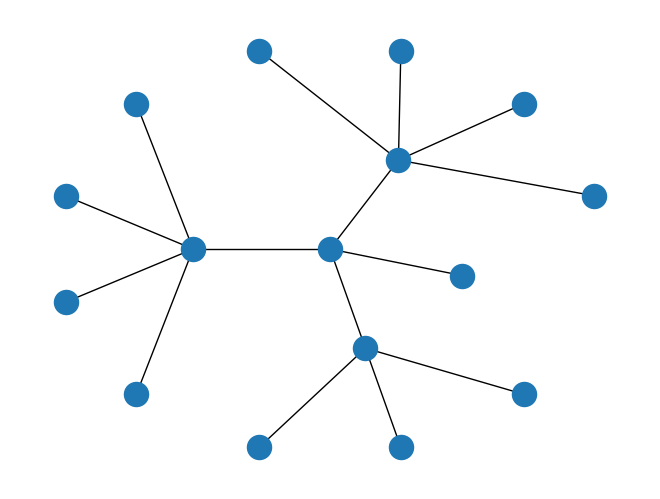

In [5]:
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi")
nx.draw(G,pos)
plt.show()

In [ ]:
#Упражнение 1:
#1)Напишите функцию, которая "дополняет" данное на вход дерево до полного графа
#2)Посчитайте количество добавленных ребер
#3)Существует ли закономерность между числом вершин и числом добавленных ребер?
# (ответ напишите комментарием или прямой формулой)

def make_full_graph(G):
  num_of_added_edges = 0
  ##############################################
  ##TODO: Здесь должен быть код Вашей функции###
  ##############################################
  return G, num_of_added_edges
import random

def is_complete(G):
    n = G.order()
    return n*(n-1)/2 == G.size()

for i in range(20):
  r = random.randint(1,5)
  n = random.randint(r+1,100)
  G = nx.full_rary_tree(r,n)
  G_full, num_of_added_edges = make_full_graph(G)
  print('--------------------------------------')
  print('Tree with',n,'vertices')
  print('Expanded to full graph:',is_complete(G_full))
  print('Number of added edges',num_of_added_edges)

##############################################
#TODO: Здесь должен быть Ваш ответ на пункт 3#
##############################################

**Определение:** Граф $G = (V,E)$ называется взвешенным, если каждому ребру графа сопоставлено некоторое числовое значение. Значения могут быть ограничены определенным доменом, например натуральными числами, целыми числами, действительными числами и другими.

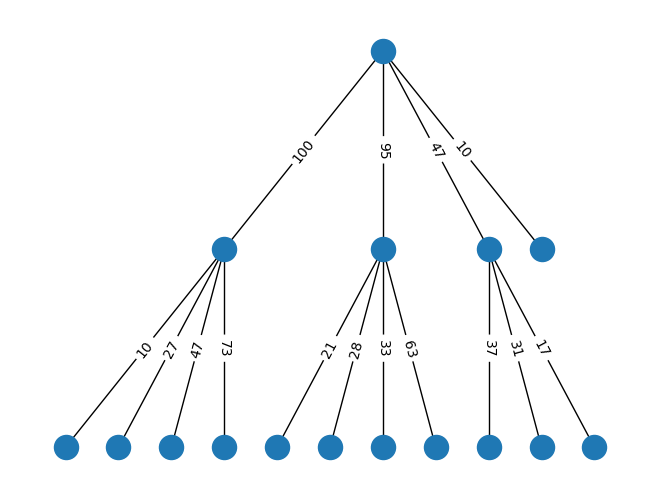

In [7]:
#Давайте добавим некоторые веса к вершинам дерева, которое мы рассмотрели выше
#В качестве веса ребра выберем случайное целое от 1 до 100
#Теперь у каждого ребра будет аттрибут, который мы назовем weight
import random
G = nx.full_rary_tree(4,16)
for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randint(1,100)

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = dict([((n1, n2), G[n1][n2]['weight'])
                    for n1, n2 in G.edges])
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

**Определение:** Подграфом исходного графа $G = (V,E)$ называется граф $G' = (V',E')$, содержащий некое подмножество вершин данного графа (то есть $V' \subset V$) и некое подмножество инцидентных им рёбер.

**Определение:** Остовное дерево графа $G = (V,E)$ (spanning tree) — это дерево, подграф $G' = (V',E')$ графа $G$, с тем же числом вершин, что и у исходного графа (то есть $|V|=|V'|$).

**Определение:** Мринимальное остовное дерево графа $G = (V,E)$ это остовное дерево, имеющее минимальный возможный вес, где под весом дерева понимается сумма весов входящих в него рёбер.

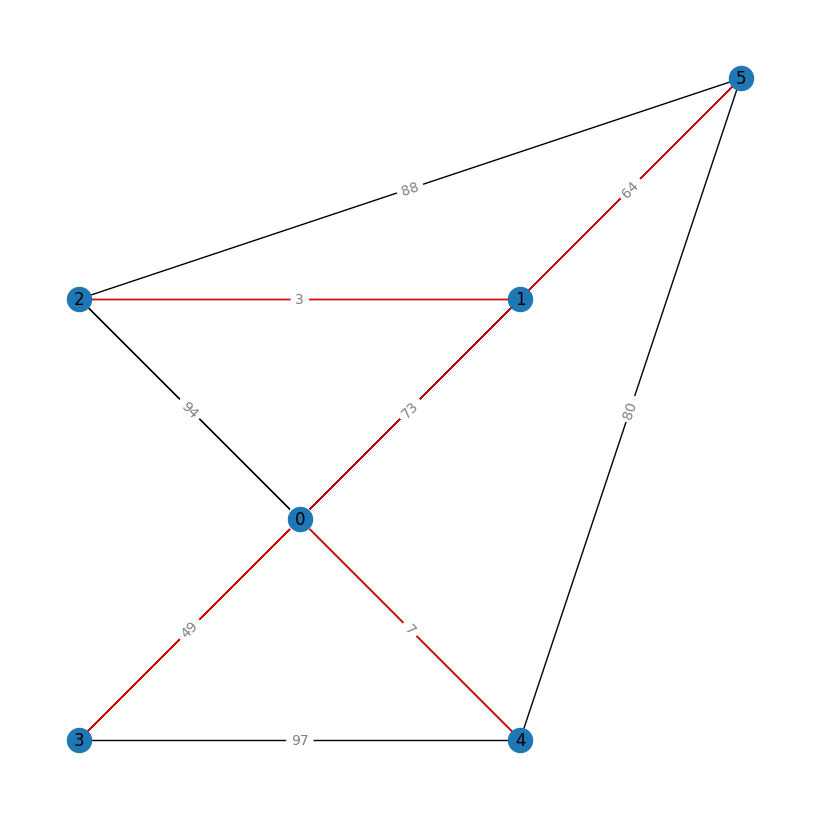

In [8]:
#Рассмотрим простой пример, возьмем некоторый граф, сделаем его взвешенным
#и попробуем выделить в нем минимальное остновное дерево (м.о.д.) через networkx
#красным цветом выделены ребра, входящие в м.о.д.
plt.rcParams["figure.figsize"] = (8,8)
G = nx.octahedral_graph()
for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randint(1,100)
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi")
edge_labels = dict([((n1, n2), G[n1][n2]['weight'])
                    for n1, n2 in G.edges])
T = nx.minimum_spanning_tree(G)
nx.draw(G, pos, with_labels = True)

nx.draw_networkx_edges(T, pos, edge_color = "red", alpha=1)
nx.draw_networkx_edge_labels(G, pos, edge_labels, alpha = 0.5)
plt.show()

Как видно из примера выше, минимальное остовное дерево это "каркас" для графа с минимальным весом - он соединяет все вершины, включает в себя минимальное число ребер (это следует из свойств дерева), а также обладает наименьшим весом всех ребер из всех возможных комбинаций. Минимальное остовное дерево служит основой для большого числа алгоритмов различной сложности, на основании минимального остовного дерева можно строить неплохие приближения для решения таких задач, как [задача коммивояжера](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BC%D0%B8%D0%B2%D0%BE%D1%8F%D0%B6%D1%91%D1%80%D0%B0#:~:text=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%20%D0%BA%D0%BE%D0%BC%D0%BC%D0%B8%D0%B2%D0%BE%D1%8F%D0%B6%D1%91%D1%80%D0%B0%20(%D0%B8%D0%BB%D0%B8%20TSP%20%D0%BE%D1%82,%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D1%8E%D1%89%D0%B8%D0%BC%20%D0%B2%D0%BE%D0%B7%D0%B2%D1%80%D0%B0%D1%82%D0%BE%D0%BC%20%D0%B2%20%D0%B8%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9%20%D0%B3%D0%BE%D1%80%D0%BE%D0%B4.)

In [9]:
#Упражнение 2
#Напишите функцию, которая для графа, приведенного в примере, перебирает все
#остовные деревья. Выведите на экран все веса построенных деревьев, определите
#разброс весов среди всех остовов (разницу между максимальным и минимальным).

def print_all_spanning_trees_weights(G):
  sp_trees_weights = [0]
  #########################################################################
  ##TODO: Здесь должен быть Ваш код########################################
  ##Программа должна перебирать все остовные деревья#######################
  ##И возвращать все найденные веса, а так же печатать их в консоль########
  #########################################################################
  return sp_trees_weights

sp_trees_weights = print_all_spanning_trees_weights(G)
print(min(sp_trees_weights), max(sp_trees_weights))
print(max(sp_trees_weights) - min(sp_trees_weights))

0 0
0


Существует несколько алгоритмов для эффективного нахождения [минимального остовного дерева](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BE%D1%81%D1%82%D0%BE%D0%B2%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE) в графе. Сфокурсируемся на формулировке и оптимизации [алгоритма Прима](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9F%D1%80%D0%B8%D0%BC%D0%B0)
.

Опишем алгоритм не фокусируясь на деталях имплементации конкретных структур данных, а после проанализируем зависимость временной сложности от деталей реализации и формата входных данных.

**Мы будем описывать алгоритм для связного графа, в случае несвязного графа алгоритм требует модификации.**

**Вход алгоритма**: взвешенный связный неориентированный граф $G=(V,E)$.

**Выход алгоритма**: минимальное остовное дерево графа $G$.

Общая идея алгоритма заключается в следующем: на каждом шаге алгоритма рассматриваются два множества - множество вершин, до которых уже построено минимальное остовное дерево, и множество вершин, которые еще не включены в построенное минимальное остновное дерево. Алгоритм жадным образом выбирает ребро минимального веса обладающее свойством, что один конец ребра лежит в первом множестве, а второй конец - во втором.

Для удобства описания будем считать что для каждой вершины мы можем хранить значение минимального веса ребра, которое соединит данную вершину с уже построенным минимальным остовным деревом (на каждой итерации мы можем выбирать вершину с минимальным расстоянием до уже построенного дерева).

Корректность процедуры обосновывается на лекционных занятиях, мы сосредоточимся на деталях имплементации. Псевдокод процедуры согласно [упомянутому описанию](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9F%D1%80%D0%B8%D0%BC%D0%B0) выглядит следующим образом:

* $d[i]$ - минимальное расстояние от $i$-й вершины до построенного дерева.
* $p[i]$ - предок  предок $i$-й вершины, то есть такая вершина $u$, что $\{u,i\}$ легчайшее из всех рёбер, соединяющее $i$ с вершиной из построенного дерева.
* $w[i][j]$ - вес ребра $\{i,j\}$.
* $Q$ - [очередь с приоритетом](https://ru.wikipedia.org/wiki/%D0%9E%D1%87%D0%B5%D1%80%D0%B5%D0%B4%D1%8C_%D1%81_%D0%BF%D1%80%D0%B8%D0%BE%D1%80%D0%B8%D1%82%D0%B5%D1%82%D0%BE%D0%BC_(%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)) для вершин графа, ключ в очереди - величина $d[i]$.
* $T$ - множество ребер построенного на текущий момент минимального остовного дерева.
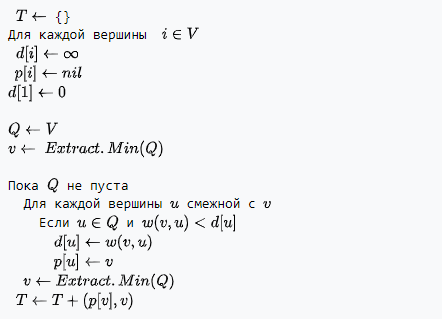

Как видно из листинга алгоритма Прима выше, временная сложность реализации сильно зависит от:
* способа имплементации очереди с приоритетом;
* способа хранения ребер графа (поскольку у нас имеется цикл "для каждой вершины $u$ смежной с $v$).
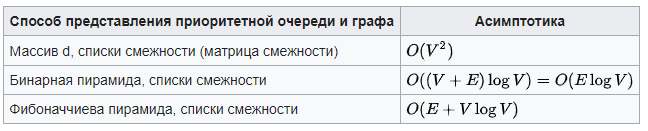


**Задание на самостоятельное чтение:**

Ознакомьтесь с материалом [статьи про алгоритм Прима](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9F%D1%80%D0%B8%D0%BC%D0%B0). Прочитайте о различных способах имплементации очереди с приоритетом, ответьте на следующие вопросы:

1) Какова будет временная сложность в случае [другого представления данных](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D1%84_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)#%D0%A1%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D1%8B_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%B0_%D0%B2_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B5)

2) Сколько памяти требуется для алгоритма Прима во всех перечисленных выше вариантах представления графа и очереди? (асимтотика)

3) В каких случаях (для какого класса графов) представление бинарной пирамидой и Фибоначчиевой кучей будут давать одинаковое асимптотическое время работы в задаче нахождения м.о.д.?

In [ ]:
#Упражнение 3
#Напишите первую (не обязательно оптимальную) имплементацию алгоритма Прима#
#В данной имплементации Вам нельзя пользоваться никакими готовыми библиотечными
#структурами данных (куча, очередь с приоритетом и т.п.), только стандартные
#средства языка Python (словари, кортежи, списки, множества и т.д.)
import random
import networkx as nx

def my_Prim(G):
  T = nx.Graph() #м.о.д.
  #######################################
  ##TODO: здесь Ваш код алгоритма Прима##
  #######################################
  return T


#Короткий тест на корректность для Вашей имплементации#:
for i in range(10):
  n = random.randint(20,30)
  m = random.randint(50,100)
  G=nx.gnm_random_graph(n,m)
  for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randint(1,100)
  T1 = nx.minimum_spanning_tree(G, algorithm = 'prim')
  T2 = my_Prim(G)
  w1 = T1.size(weight="weight")
  w2 = T2.size(weight="weight")
  print('T1 weight =', w1, 'T2 weight =', w2, end=' ')
  if w1 == w2:
    print('OK')
  else:
    print('FAIL')

T1 weight = 805.0 T2 weight = 0.0 FAIL
T1 weight = 469.0 T2 weight = 0.0 FAIL
T1 weight = 398.0 T2 weight = 0.0 FAIL
T1 weight = 407.0 T2 weight = 0.0 FAIL
T1 weight = 314.0 T2 weight = 0.0 FAIL
T1 weight = 490.0 T2 weight = 0.0 FAIL
T1 weight = 235.0 T2 weight = 0.0 FAIL
T1 weight = 812.0 T2 weight = 0.0 FAIL
T1 weight = 549.0 T2 weight = 0.0 FAIL
T1 weight = 315.0 T2 weight = 0.0 FAIL


In [ ]:
#Упражнение 4 (*)
#Напишите имплементацию алгоритма Прима с использованием бинарной кучи или
#Фибоначчиевой кучи. Сравните эффективность двух алгоритмов (оптимизированного
#и неоптимизированного) по времени.
#В данном упражнении можно пользоваться стандартными реализациями
#сложных структур данных, но для лучшего понимания рекомендуется написать
#эффективную имплементацию очереди с приоритетом.
import random
import networkx as nx

def my_Prim_opt(G):
  T = nx.Graph() #м.о.д.
  #######################################
  ##TODO: здесь Ваш код алгоритма Прима##
  #######################################
  return T


#Короткий тест на корректность для Вашей имплементации#:
for i in range(10):
  n = random.randint(20,30)
  m = random.randint(50,100)
  G=nx.gnm_random_graph(n,m)
  for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randint(1,100)
  T1 = nx.minimum_spanning_tree(G, algorithm = 'prim')
  T2 = my_Prim_opt(G)
  w1 = T1.size(weight="weight")
  w2 = T2.size(weight="weight")
  print('T1 weight =', w1, 'T2 weight =', w2, end=' ')
  if w1 == w2:
    print('OK')
  else:
    print('FAIL')


import time

#Сравнение скорости работы:#
for i in range(10):
  n = random.randint(40,50)
  m = random.randint(80,100)
  G=nx.gnm_random_graph(n,m)
  for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randint(1,100)
  start1 = time.time()
  T1 = my_Prim(G)
  end1 = time.time()
  start2 = time.time()
  T2 = my_Prim_opt(G)
  end2 = time.time()
  print('-------------------------------------------')
  print('Prim time =', end1-start1, 'Prim opt time =', end2-start2)

T1 weight = 761.0 T2 weight = 0.0 FAIL
T1 weight = 565.0 T2 weight = 0.0 FAIL
T1 weight = 274.0 T2 weight = 0.0 FAIL
T1 weight = 462.0 T2 weight = 0.0 FAIL
T1 weight = 201.0 T2 weight = 0.0 FAIL
T1 weight = 642.0 T2 weight = 0.0 FAIL
T1 weight = 413.0 T2 weight = 0.0 FAIL
T1 weight = 309.0 T2 weight = 0.0 FAIL
T1 weight = 324.0 T2 weight = 0.0 FAIL
T1 weight = 1007.0 T2 weight = 0.0 FAIL
-------------------------------------------
Prim time = 1.0728836059570312e-05 Prim opt time = 4.291534423828125e-06
-------------------------------------------
Prim time = 9.5367431640625e-06 Prim opt time = 4.5299530029296875e-06
-------------------------------------------
Prim time = 8.821487426757812e-06 Prim opt time = 3.5762786865234375e-06
-------------------------------------------
Prim time = 1.1682510375976562e-05 Prim opt time = 3.337860107421875e-06
-------------------------------------------
Prim time = 3.814697265625e-06 Prim opt time = 2.384185791015625e-06
------------------------------